### Randon Forest Model
### Adult Income Modelling
### UCI Adult Income Dataset
### https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
### Predict whether an individual earn >$50k or less

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                   names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
                          'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
                          'hours_per_week', 'native_country', 'income'])


In [3]:
print(data.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [5]:
features = ['age', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'hours_per_week']
target = 'income'
X = data[features]
y = data[target]

In [6]:
print(X.isnull().sum())

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
hours_per_week    0
dtype: int64


In [7]:
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [8]:
# Encode categorical variables
encoder = OneHotEncoder(handle_unknown='ignore')
X = pd.DataFrame(encoder.fit_transform(X).toarray())

In [9]:
# Train - test  - split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Build the model pipeline
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [11]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Make Predictions
y_pred = model.predict(X_test)

In [14]:
# Evaluations 1
print(accuracy_score(y_test, y_pred))

0.8206571808782884


In [15]:
# Evaluation 2
print(confusion_matrix(y_test, y_pred))

[[6765  690]
 [1062 1252]]


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.89      7455
        >50K       0.64      0.54      0.59      2314

    accuracy                           0.82      9769
   macro avg       0.75      0.72      0.74      9769
weighted avg       0.81      0.82      0.82      9769



In [19]:
# add new data
new_data = pd.DataFrame({
    'age': [30, 50],
    'workclass': ['Private', 'Self-emp-not-inc'],
    'education': ['Bachelors', 'Masters'],
    'marital_status': ['Never-married', 'Married-civ-spouse'],
    'occupation': ['Tech-support', 'Exec-managerial'],
    'relationship': ['Not-in-family', 'Husband'],
    'race': ['White', 'Black'],
    'sex': ['Male', 'Female'],
    'hours_per_week': [40, 1000]
})

In [18]:
# Predict on new data
new_data = pd.DataFrame(imputer.transform(new_data), columns=new_data.columns)
new_data = pd.DataFrame(encoder.transform(new_data).toarray())
new_predictions = model.predict(new_data)
print("New Predictions:", new_predictions)

New Predictions: [' <=50K' ' <=50K']


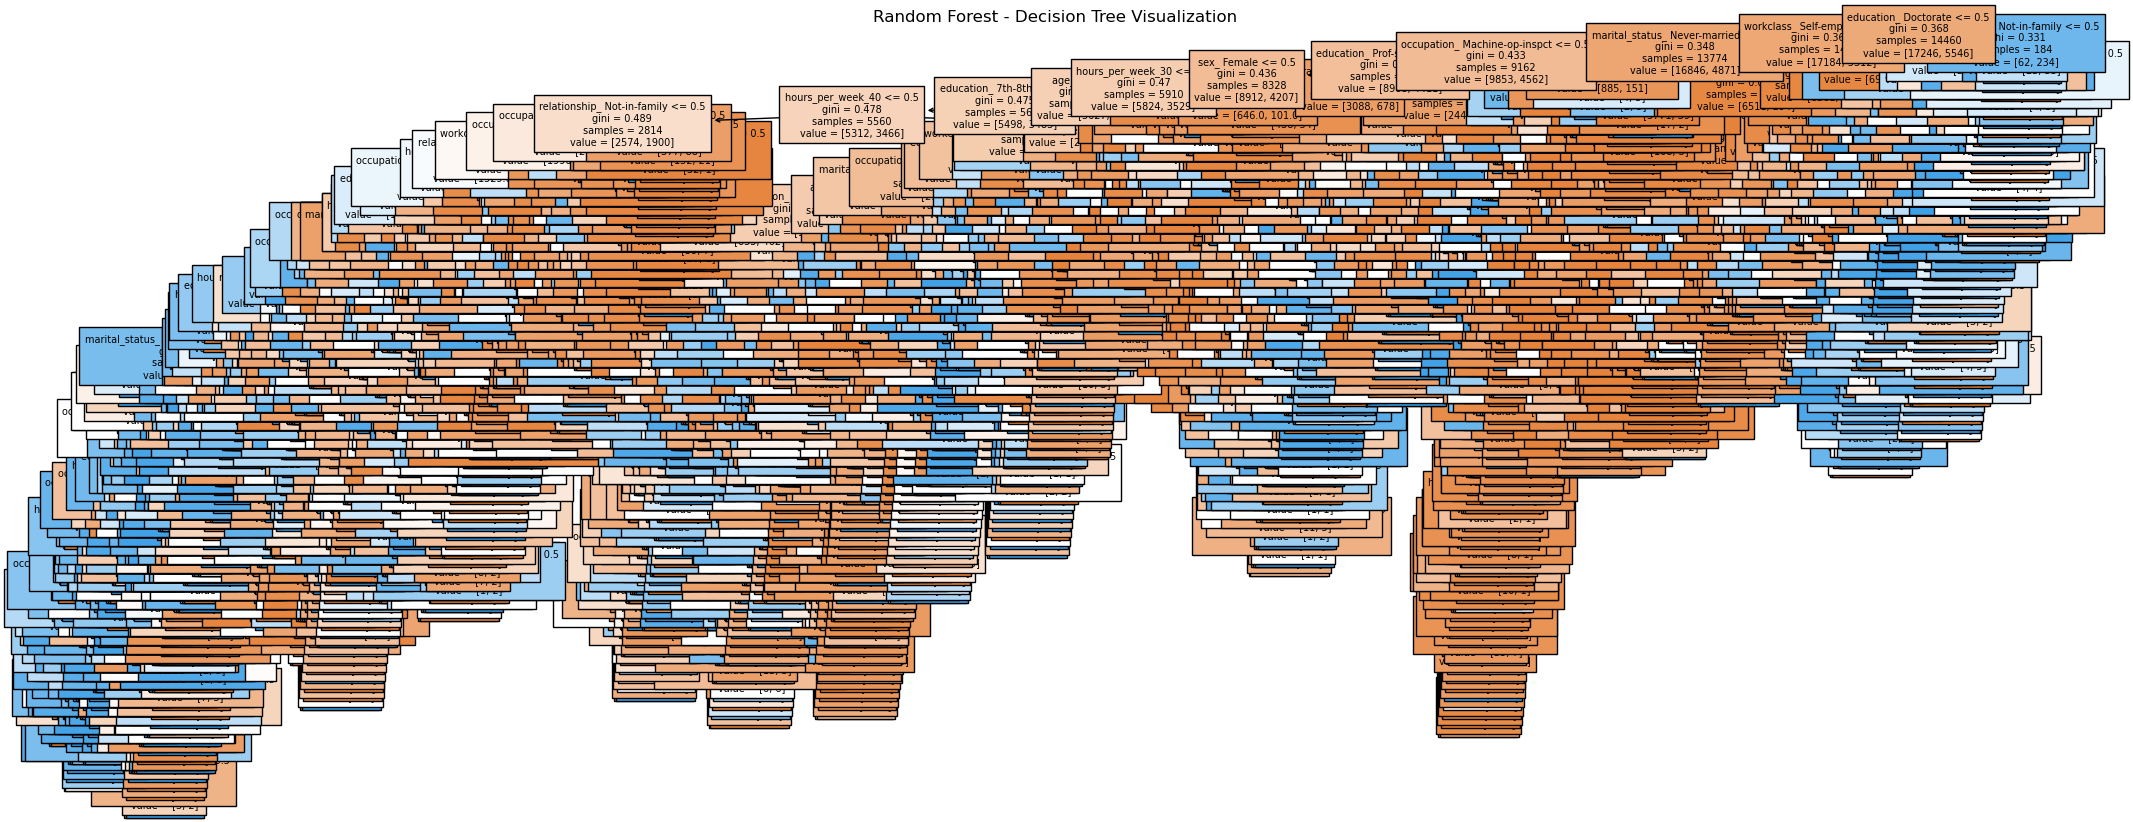

In [20]:
# Visualize
plt.figure(figsize=(25, 10))
plot_tree(model.estimators_[0], feature_names=encoder.get_feature_names_out(), filled=True, fontsize=7)
plt.title("Random Forest - Decision Tree Visualization")
plt.show()